# Ridge Regression

Ridge regression (AKA Tychonoff regularization, AKA $L^2$ penalization) is a penalized version of linear regression.
StatTools implements ridge regression by providing the `Ridge` estimator class in its `glm` module.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.glm import LinearRegression, Ridge

In [2]:
# Set NumPy random number generator seed for replicability
np.random.seed(100)

## Load the Diabetes Dataset

In [3]:
data = datasets.load_diabetes()

# Shuffle data
n = len(data.target)
idx = np.random.permutation(n)
x = data.data[idx, :]
y = data.target[idx]

# 50/50 training/testing split
x_train = x[:(n // 2), :]
x_test = x[(n // 2):, :]
y_train = y[:(n // 2)]
y_test = y[(n // 2):]

## Fit a Classical Linear Regression Model

In [4]:
%%time
model = LinearRegression().fit(x_train, y_train)

CPU times: user 1.41 ms, sys: 1.04 ms, total: 2.45 ms
Wall time: 1.52 ms


### Report Mean Squared Error

In [5]:
mse_train = model.mse(x_train, y_train)
mse_test = model.mse(x_test, y_test)
mse_full = model.mse(x, y)
print(f"Training MSE:   {mse_train:.3f}")
print(f"Testing MSE:    {mse_test:.3f}")
print(f"Full data MSE:  {mse_full:.3f}")

Training MSE:   2500.425
Testing MSE:    3320.616
Full data MSE:  2910.521


## Fit a Ridge Regression Model

In [6]:
%%time
model = Ridge(lam=0.1)
model.fit(x_train, y_train)

CPU times: user 1.52 ms, sys: 1.2 ms, total: 2.72 ms
Wall time: 1.67 ms


### Report Mean Squared Error

In [7]:
mse_train = model.mse(x_train, y_train)
mse_test = model.mse(x_test, y_test)
mse_full = model.mse(x, y)
print(f"Training MSE:   {mse_train:.3f}")
print(f"Testing MSE:    {mse_test:.3f}")
print(f"Full data MSE:  {mse_full:.3f}")

Training MSE:   2500.525
Testing MSE:    3319.699
Full data MSE:  2910.112


## Regularization Path

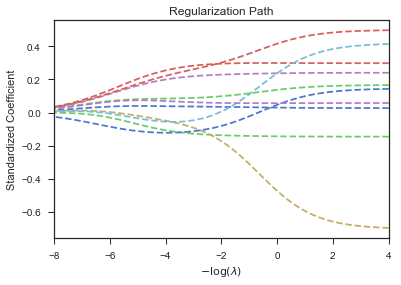

In [8]:
lam_min = np.exp(-4)
lam_max = np.exp(8)

lambdas = np.geomspace(start=lam_min, stop=lam_max, num=100)
path = np.empty((len(lambdas), len(data.feature_names)))
mses = np.empty(len(lambdas))
for i, lam in enumerate(lambdas):
    model_ = Ridge(lam=lam).fit(x_train, y_train)
    mses[i] = model_.mse(x_test, y_test)
    path[i, :] = model_._coef

plt.figure()
for j in range(len(data.feature_names)):
    plt.plot(-np.log(lambdas), path[:, j], ls="--")

plt.title("Regularization Path")
plt.xlabel("$-\log(\lambda)$")
plt.ylabel("Standardized Coefficient")
plt.xlim((-np.log(lam_max), -np.log(lam_min)))
plt.show()
plt.close()

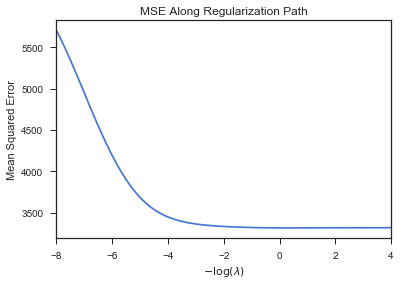

In [9]:
plt.figure()
plt.plot(-np.log(lambdas), mses)
plt.title("MSE Along Regularization Path")
plt.xlabel("$-\log(\lambda)$")
plt.ylabel("Mean Squared Error")
plt.xlim((-np.log(lam_max), -np.log(lam_min)))
plt.show()
plt.close()

## References

* Arthur E. Hoerl, Robert W. Kennard.
  "Ridge Regression: Biased Estimation for Nonorthogonal Problems".
  Technometrics. Vol. 12, No. 1, 1970, pp. 55–67. ([DOI](https://doi.org/10.2307/1267351))